# Центральная предельная теорема своими руками

### Подключаем необходимые библиотеки
```scipy.stats``` - для работы с распределениями<br>
```matplotlib.pyplot``` - для построения графиков<br>
```numpy``` - для удобной генерации массивов (всего лишь одного)<br>
```math``` - для того, чтобы взять корень из дисперсии<br>

In [200]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

### Задаем исходное распределение и строим его графики
В качестве исходного я выбрал треугольное распределение. Оно называется треугольным из-за формы графика плотности вероятности. Генерируется данное распределение функцией ```scipy.stats.triang()```. Задается распределение тремя параметрами:<br> 
```shape_param``` - параметр, отвечающий за форму функции плотности и задающий величину смещения моды от начала треугольника по оси абсцисс<br>
```loc_param``` - параметр, определяющий абсциссу начала треугольника<br>
```scale_param``` - параметр, определяющий длину треугольника по оси абсцисс<br>
(надеюсь, ничего не перепутал)<br>
#### Другие переменные
```sample_size``` - задает размер выборки из случайной величины (1000 по заданию). Это число также используетсяв программе везде, где необходимо достаточно большое число (построение графиков функций плотности вероятности, генерация выборок объема ```n```)<br>
```left_bound``` и ```right_bound``` - задают левую и правую границы для построения графиков плотности вероятности

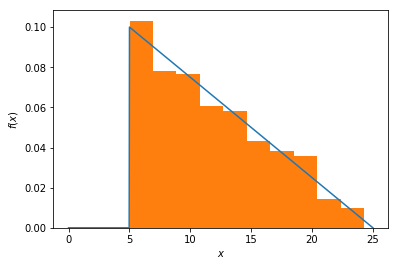

In [238]:
shape_param = 0.0001
loc_param = 5
scale_param = 20
sample_size = 1000
left_bound = 0
right_bound = 25

#задаем исходную случайную величину
triang_rv = sts.triang(shape_param, loc=loc_param, scale=scale_param)
#получаем выборку из случайной величины
sample = triang_rv.rvs(sample_size)

#задаем массив для построения графика функции плотности вероятности
x = np.linspace(left_bound, right_bound, sample_size)
#вычисляем соответствующие значения плотностей
pdf = triang_rv.pdf(x)

#строим график функции плотности вероятности
plt.plot(x, pdf)
#строим гистрограмму, нормированную к функции плотности вероятности (параметр density)
plt.hist(sample, density=True)
#подписываем оси
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

### Генерируем выборки и вычисляем средние выборочные
Выборочные средние для каждой выборки будем сохранять в список ```sample_means```. Он будет двумерным: по строкам - выборки разных объемов из списка ```sample_sizes```, по столбцам - выборочные средние в количестве ```sample_size```.

In [247]:
#создаем список для сохранения выборочных средних
sample_means = []
#создаем список с различными значениями объема выборки
sample_sizes = [1, 2, 5, 10, 30, 100]

#для каждого размера выборки
for N in sample_sizes:
    #создаем новую строку
    sample_means.append([])
    #повторяем много раз 
    for i in xrange(sample_size):
        #генерируем выборку размера N
        sample = triang_rv.rvs(N)
        #вычисляем выборочное среднее
        mean = sample.mean()
        #сохраняем выборочное среднее в конец последней строки 
        sample_means[-1].append(mean)
#выборочные средние готовы!

### Считаем параметры распределений выборочных средних
Для этого необходимо посчитать матожидание и дисперсию исходного распределения. Вообще-то, можно было бы пойти более легким путем и просто получить необходимые значения с помощью методов ```triang.mean()``` и ```triang.std()```, возвращающих матожидание и среднеквадратичное отклонение, соответственно, но так не интересно.<br>
Поэтому найдем нужные формулы (вот тут https://www.matematicus.ru/zakony-raspredeleniya-sluchajnoj-velichiny/treugolnoe-raspredelenie) и посчитаем через исходные параметры.<br>
Затем посчитаем параметры аппроксимируюих нормальных распределений, соответствующих каждой выборке размера ```N```. Точнее, считать нужно только дисперсию, так как матожидание, согласно теории, всегда совпадает с матожиданием исходного распределения. Считать будем по формуле $D_N = \frac{DX}{N}$.

In [248]:
#переменные для формулы
a = loc_param
b = loc_param + scale_param
c = loc_param + shape_param

#матожидание исходного распределения
triang_mean = (a + b + c) / 3

#дисперсия исходного распределения
triang_dispersion = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18

#выборочные оценки дисперсии
sample_dispersion = [triang_dispersion / N for N in sample_sizes]

### Почти готово! 
После того, как мы получили все необходимые выборки и параметры аппроксимирующих нормальных распределений, остается только построить графики функций плотностей вероятности для этих распределений вместе с гистограммами соответствующих выборок

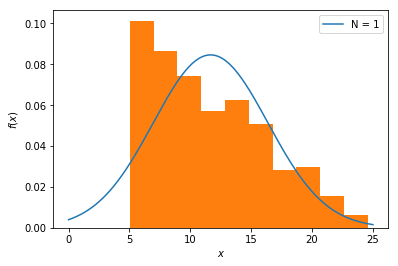

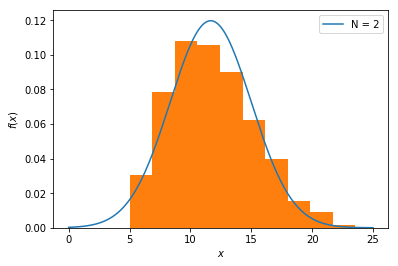

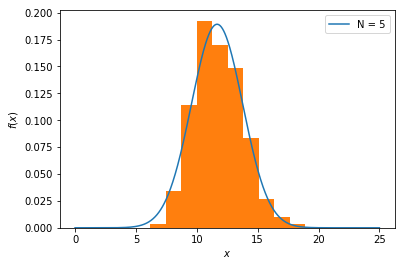

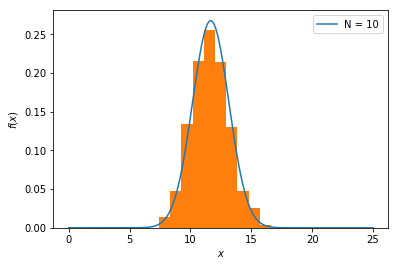

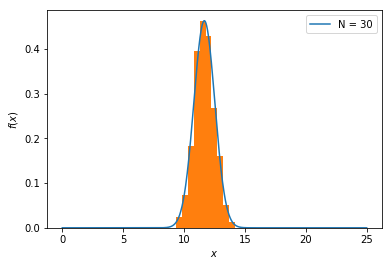

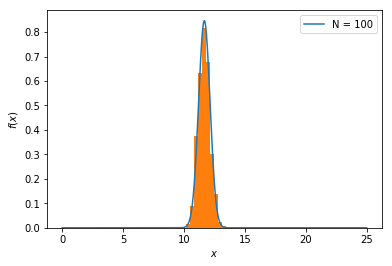

In [258]:
#для выборки каждого размера
for i in xrange(len(sample_sizes)):
    #вычисляем СКО как корень из дисперсии i-ой выборки
    rv_scale = math.sqrt(sample_dispersion[i])
    #генерируем нормальное распределение с исходным матожиданием и соответствующим СКО
    norm_rv = sts.norm(loc=triang_mean, scale=rv_scale)
    #вычисляем соответствующие значения плотностей
    pdf = norm_rv.pdf(x)
    
    #строим график функции плотности вероятности нормального распределения
    plt.plot(x, pdf, label='N = %s' % sample_sizes[i])
    #строим нормированную гистограмму i-ой выборки
    plt.hist(sample_means[i], density=True)
    plt.legend()
    #подписываем оси
    plt.ylabel("$f(x)$")
    plt.xlabel("$x$")
    plt.show()

### Выводы
По графикам, полученным в итоге работы, видно, что при увеличении объема выборки из случайной величины, распределение которой имеет произвольный вид, распределение выборочных средних всё менее точно повторяет форму распределения исходной случайной величины, постепенно и вовсе переставая быть на него похожим. Так, например, в моей работе асимметрия исходного треугольного распределения перестает быть заметной уже при $N = 5$. Кроме того, распределение с увеличением $N$ все точнее повторяет форму нормального распределения, дисперсия которого при этом уменьшается. 
#### ЦПТ РАБОТАЕТ!!
Наша работа доказывает, что центральная предельная теорема действительно работает. Это волшебное свойство статистик может быть использовано для случайной величины любого рода. То есть можно, не зная исходного закона распределения, иметь достаточно большую ее и работать с этой выборкой как со случайной величиной, распределенной по нормальному закону. Магия, да и только!